# Naive Bayes

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the preprocessed dataset
dataset = pd.read_csv('preprocessed_mental_health.csv')

# Check if 'cleaned_text' and 'mental_health_issue' columns exist
if 'cleaned_text' not in dataset.columns or 'mental_health_issue' not in dataset.columns:
    raise ValueError("The dataset must have 'cleaned_text' and 'mental_health_issue' columns.")

# Remove rows with missing values in 'cleaned_text' column
dataset.dropna(subset=['cleaned_text'], inplace=True)

# Initialize the CountVectorizer and fit/transform the cleaned text
NBvectorizer = CountVectorizer()
X = NBvectorizer.fit_transform(dataset['cleaned_text'])

# Prepare the target variable
y = dataset['mental_health_issue']

# Split the dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
NBmodel = MultinomialNB()

# Fit the model
NBmodel.fit(X_train, y_train)

# Make predictions
y_pred = NBmodel.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 83.63%
Classification Report:
               precision    recall  f1-score   support

     anxiety       0.70      0.73      0.72       379
     bipolar       0.83      0.45      0.58       384
  depression       0.59      0.87      0.70       373
      normal       0.96      0.92      0.94      2183
        ptsd       0.71      0.83      0.76       394

    accuracy                           0.84      3713
   macro avg       0.76      0.76      0.74      3713
weighted avg       0.85      0.84      0.84      3713

Confusion Matrix:
 [[ 278    4   63    3   31]
 [  30  171   62   86   35]
 [  26    6  323    0   18]
 [  38   21   68 2006   50]
 [  24    5   34    4  327]]


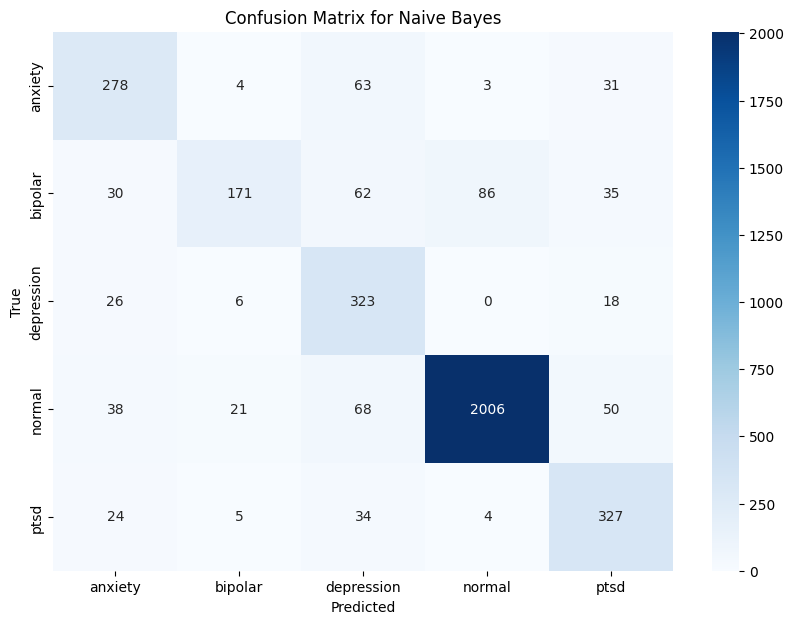

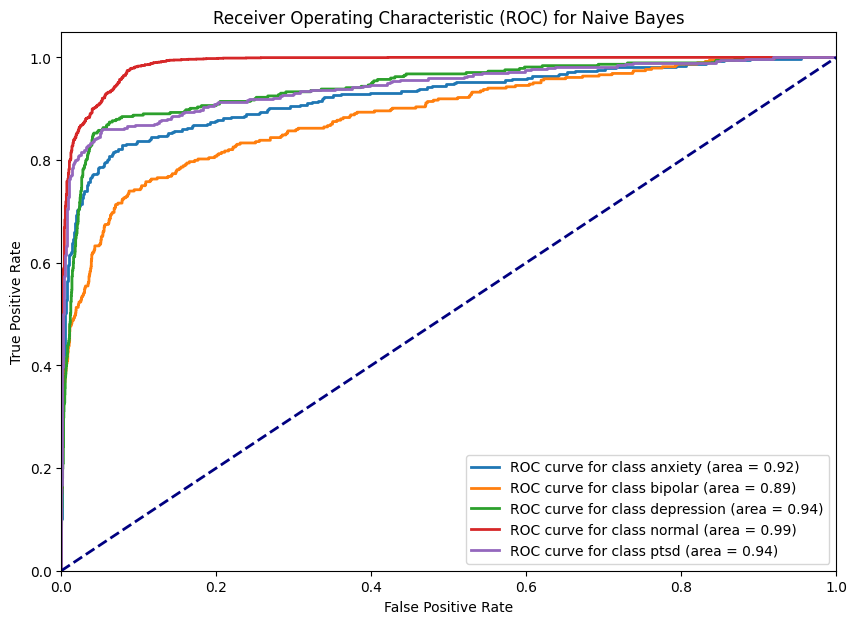

In [2]:
# Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=NBmodel.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=NBmodel.classes_, yticklabels=NBmodel.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# ROC Curve

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for ROC
y_test_binarized = label_binarize(y_test, classes=NBmodel.classes_)
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], NBmodel.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for class {0} (area = {1:0.2f})'.format(NBmodel.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Naive Bayes')
plt.legend(loc="lower right")
plt.show()


In [3]:
# Saving the NBmodel and NBvectorizer

import joblib

# Save the best model and vectorizer
joblib.dump(NBmodel, 'NBmodel.pkl')
joblib.dump(NBvectorizer, 'NBvectorizer.pkl')

['NBvectorizer.pkl']

In [4]:
!jupyter nbconvert --to html 04_Naive_Bayes.ipynb

[NbConvertApp] Converting notebook 04_Naive_Bayes.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 445607 bytes to 04_Naive_Bayes.html
